In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import PolynomialFeatures
import datetime 
import pytz
from pytz import timezone
import tarfile
from numpy import load
import os
from sklearn.manifold import TSNE
import h5py
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
import scipy as sp
from scipy import spatial

In [17]:
h5 = h5py.File('sound_data_improved.hdf5', 'r')

In [18]:
d = h5['sound_data']

In [19]:
sample_nums = np.random.choice(range(3388858), 10000, replace = False)

In [20]:
index = np.zeros(d.shape[0]).astype('bool')
index[sample_nums] = True

# Clustering on 45 dimensions

In [21]:
pca_45 = sklearnPCA(45)  
projected_45 = pca_45.fit_transform(d['feature_vector'])

In [22]:
projected_tsne_45 = TSNE(n_components=2).fit_transform(projected_45[index])

Plot 1: eps = 6.0, silhouette score = 0.31730622, calinski harabasz score = 3339.569635544305, davies bouldin score = 1.8296405410850396
Plot 2: eps = 6.1, silhouette score = 0.32085028, calinski harabasz score = 3336.9774807242784, davies bouldin score = 1.8199455372890916
Plot 3: eps = 6.2, silhouette score = 0.3232472, calinski harabasz score = 3344.3953662552826, davies bouldin score = 1.7998668184421494
Plot 4: eps = 6.3, silhouette score = 0.33122346, calinski harabasz score = 3336.8933546825315, davies bouldin score = 1.7951571636532915
Plot 5: eps = 6.4, silhouette score = 0.34028012, calinski harabasz score = 3337.542955665913, davies bouldin score = 1.7438328262742189
Plot 6: eps = 6.5, silhouette score = 0.34459192, calinski harabasz score = 3338.3868736464706, davies bouldin score = 1.722028525845193
Plot 7: eps = 6.6, silhouette score = 0.35120392, calinski harabasz score = 3334.342247110346, davies bouldin score = 1.6928896836905745
Plot 8: eps = 6.7, silhouette score = 0

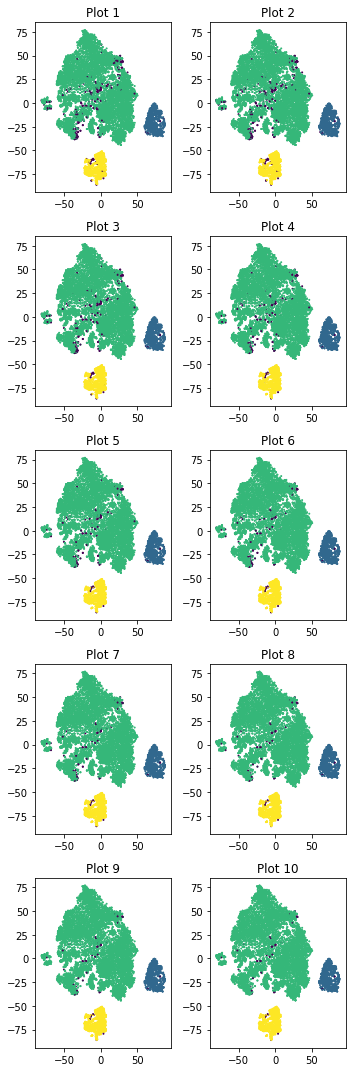

In [23]:
plt.figure(figsize=(5, 15))
idx = 1
for eps_var in range(60, 70):
    eps_x = eps_var/10.0
    dbscan = DBSCAN(eps=eps_x)
    dbscan_clusters = dbscan.fit_predict(projected_45[index])
    plt.subplot(5, 2, idx)
    plt.scatter(projected_tsne_45[:, 0], projected_tsne_45[:, 1], c=dbscan_clusters, s = 1)
    plt.title('Plot ' + str(idx))
    silhouette_score = metrics.silhouette_score(projected_45[index], dbscan.labels_, metric='euclidean')
    c_h_score = metrics.calinski_harabasz_score(projected_45[index], dbscan.labels_)
    d_b_score = davies_bouldin_score(projected_45[index], dbscan.labels_) 
    print('Plot ' + str(idx) + ': eps = ' + str(eps_var/10.0) + ', silhouette score = ' + str(silhouette_score) \
             + ', calinski harabasz score = ' + str(c_h_score) \
             + ', davies bouldin score = ' + str(d_b_score))
    idx += 1
plt.tight_layout()
plt.show()

In [24]:
#eps 5.7 seems to be good
dbscan = DBSCAN(eps=5.7)
dbscan_clusters = dbscan.fit_predict(projected_45[index])
dbscan.components_

array([[ 1.9075527e+01, -1.6177989e+00,  9.8078185e-01, ...,
        -5.0745940e-01,  2.1112986e-01,  4.7680914e-02],
       [-3.8535678e+00, -2.3173659e+00, -1.7398763e+00, ...,
        -1.6991906e-01, -4.4196412e-01,  1.1430858e-01],
       [-3.2062550e+00,  4.4957447e-01,  6.1773680e-02, ...,
        -5.7502322e-02, -3.4414595e-01, -8.4779215e-01],
       ...,
       [-1.4468861e+00,  2.5008066e+00,  1.4321113e+00, ...,
        -6.8173987e-01, -1.0280344e-02, -8.0158192e-01],
       [-2.1602671e+00,  3.0610480e+00, -3.3946563e-02, ...,
         4.6226855e-02, -5.8931750e-01,  6.2349916e-01],
       [-2.5999899e+00,  3.3086343e+00, -2.3213093e+00, ...,
        -5.5663776e-01,  3.7772718e-01,  2.1036646e-01]], dtype=float32)

# Nearest Neighbors and Corresponding Audio Files

In [26]:
tree = spatial.KDTree(projected_45[index])